In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### DataSet : https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt 
- Use KNearestNeighbourRegressor to Predict Price of House.
- Use pandas to get some insights into the data (10 marks)
- Show some interesting visualization of the data (10 marks)
- Manage data for training & testing (20)
- Finding a better value of k (10)

In [2]:
df = pd.read_csv("house_rental_data.csv")
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [5]:
round(df.describe(),3)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000,645.000,645.000,645.000,645.000,645.000,645.000
mean,1527.656,5.940,10.856,2.837,1.814,1.811,61986.823
std,767.387,3.885,4.996,1.011,0.462,0.684,35635.091
min,359.358,1.000,1.000,1.000,0.000,0.000,6100.000
25%,925.080,3.000,7.000,2.000,2.000,1.000,39000.000
50%,1423.200,5.000,12.000,3.000,2.000,2.000,50000.000
75%,1892.856,8.000,14.000,4.000,2.000,2.000,75000.000
max,5856.468,22.000,38.000,7.000,4.000,5.000,250000.000


In [6]:
df.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [7]:
df['Floor'].unique()

array([ 2,  5, 11, 10,  4,  9,  6,  3, 19,  7, 21,  8,  1, 12, 13, 18, 14,
       16, 15, 22, 17])

<Axes: >

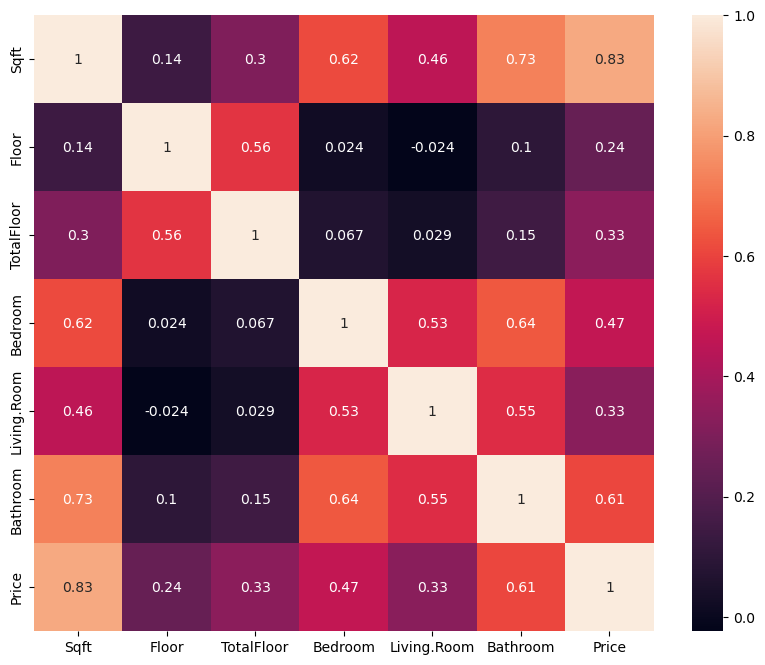

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g', linecolor='grey')

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


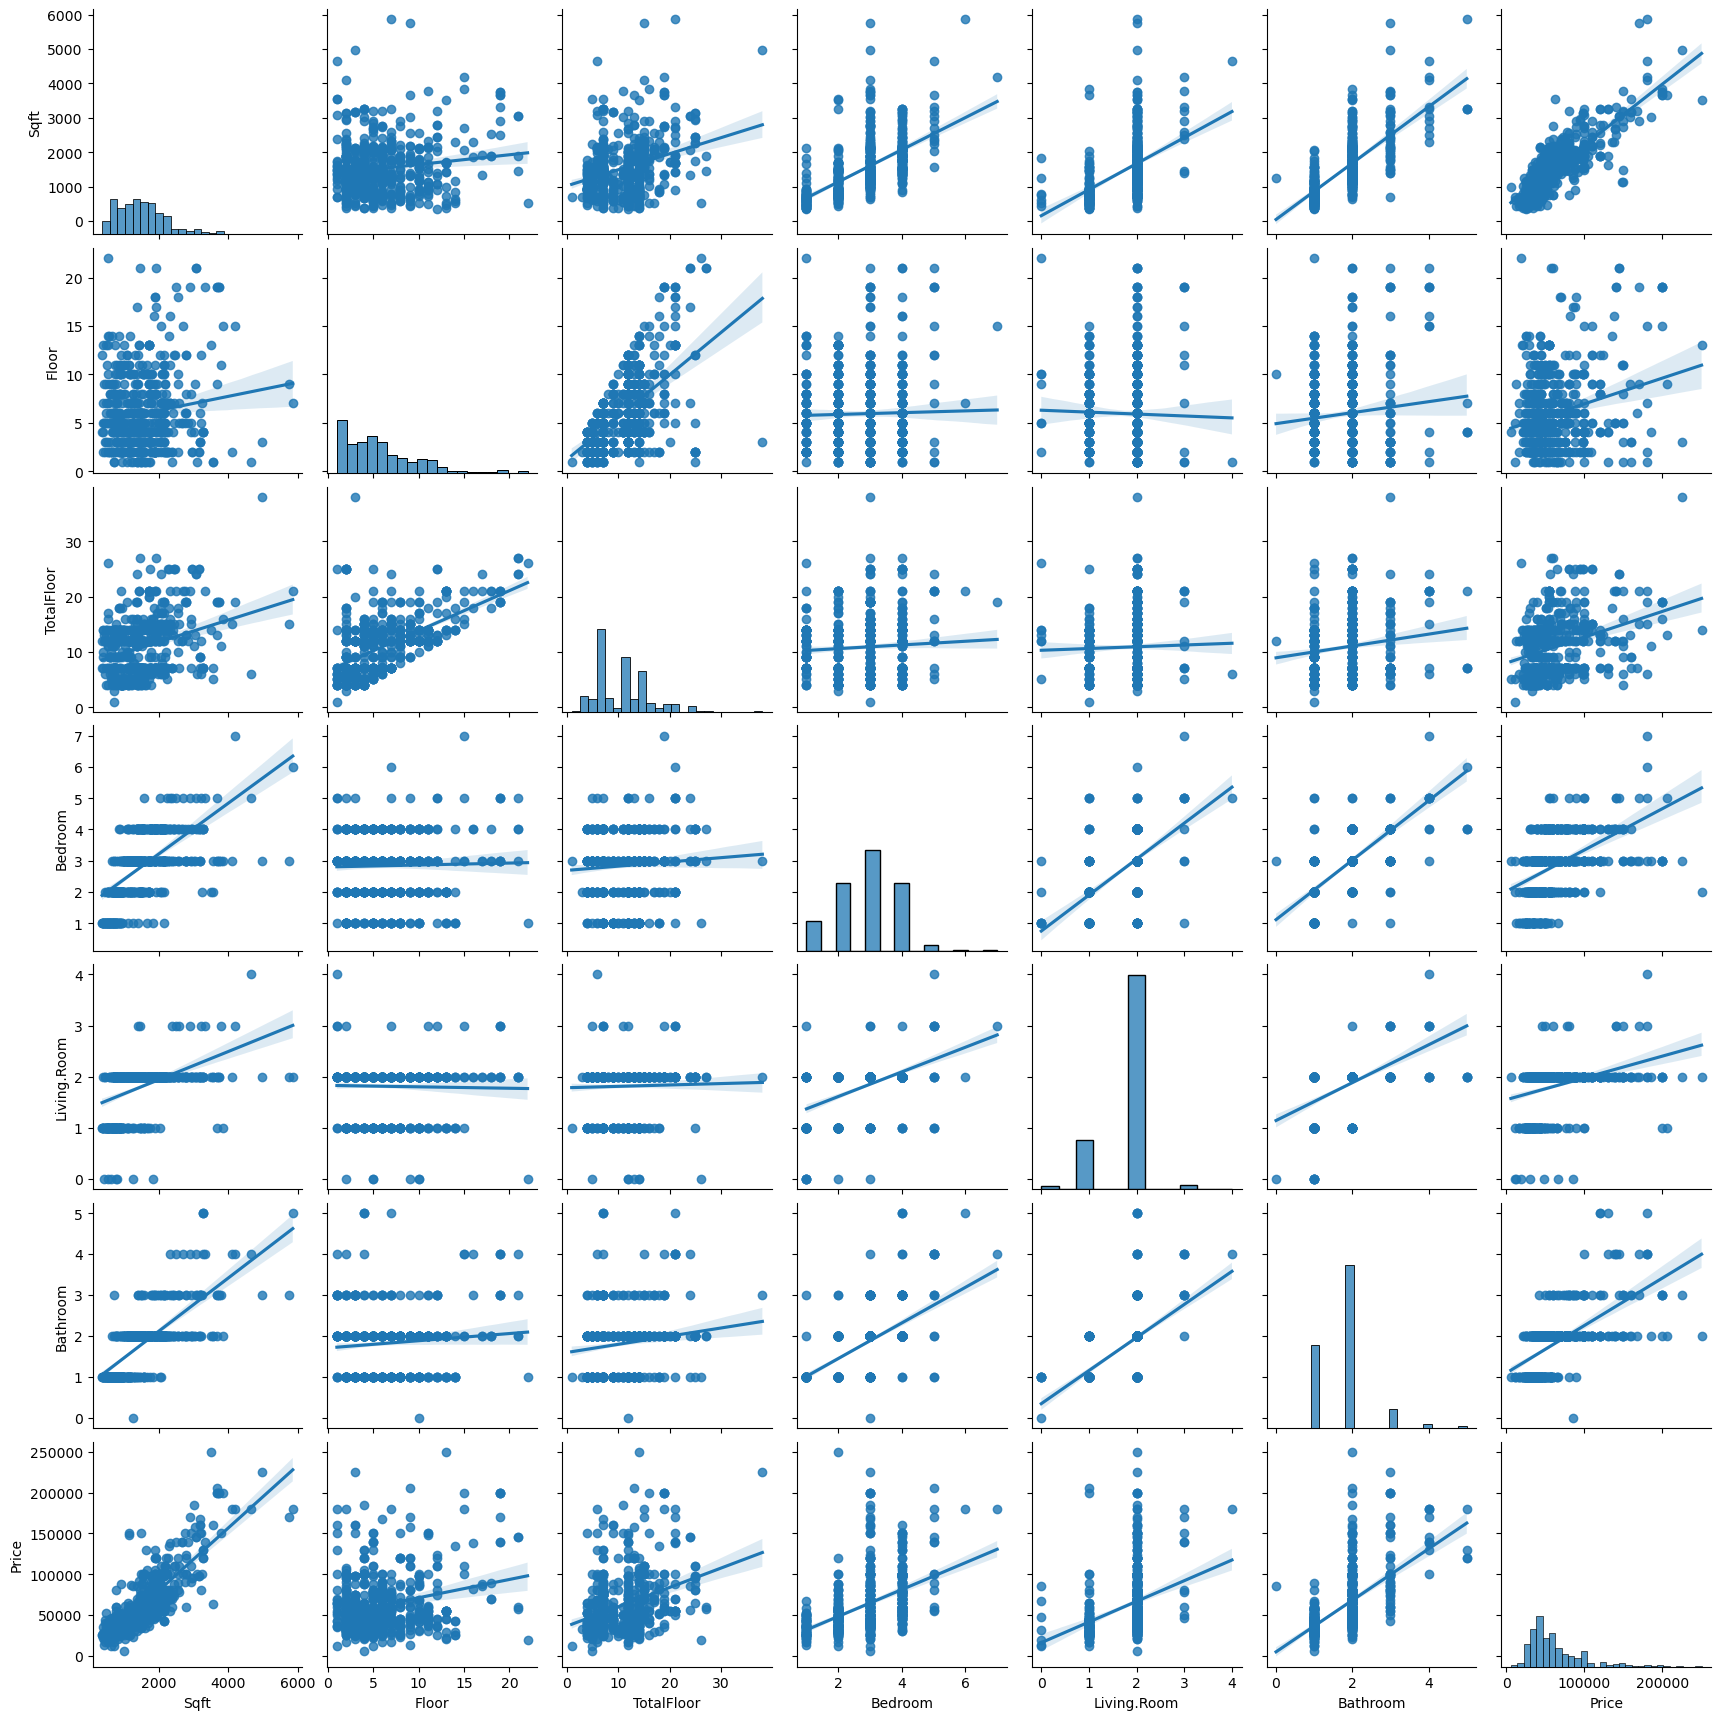

In [9]:
sns.pairplot(data=df, kind='reg')

<Axes: xlabel='Sqft', ylabel='Price'>

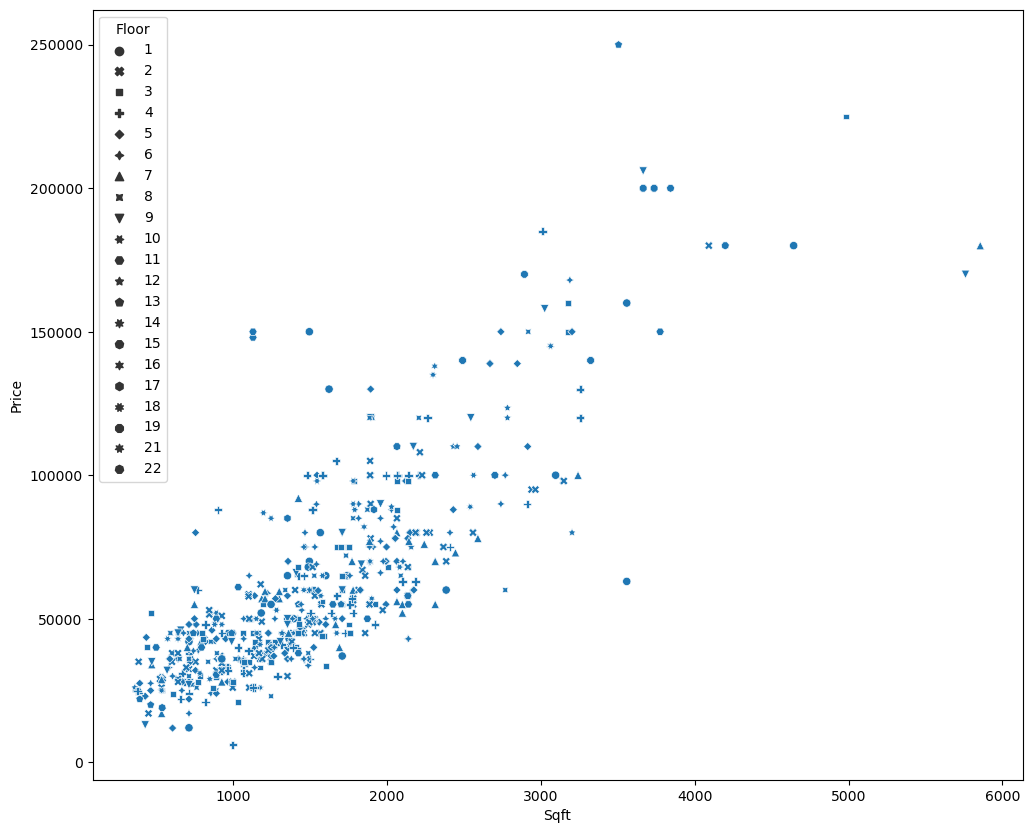

In [10]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='Sqft', y='Price', style='Floor')

<Axes: xlabel='Floor', ylabel='count'>

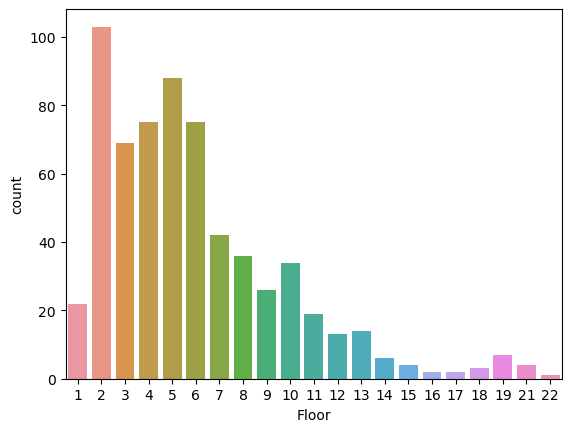

In [11]:
sns.countplot(data=df, x='Floor')

/home/kranthi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


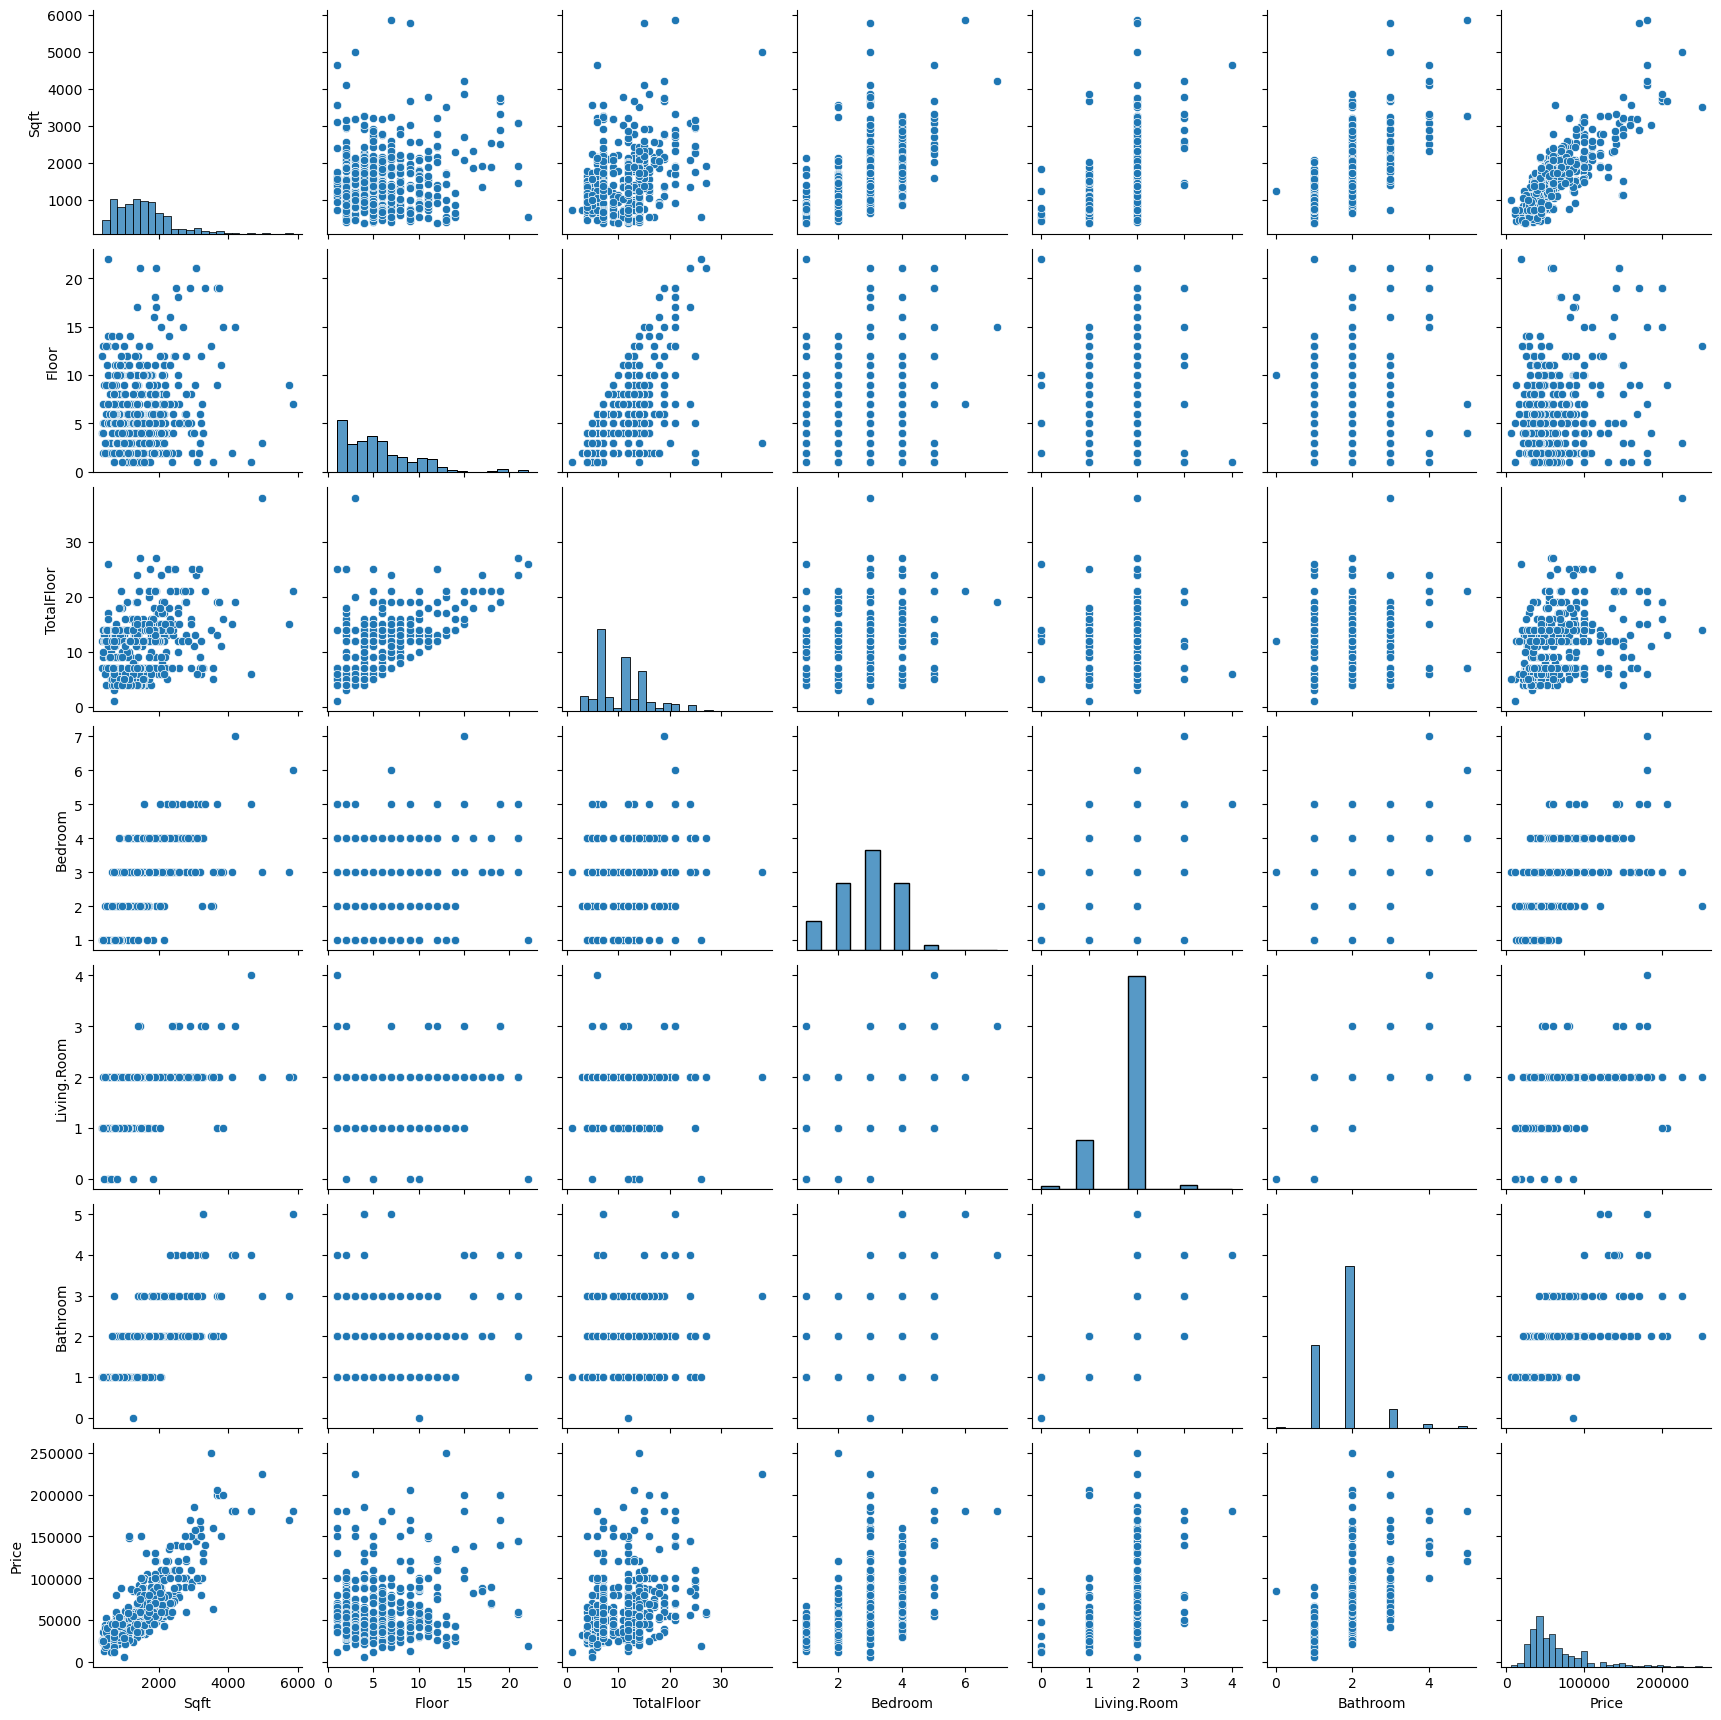

In [12]:
sns.pairplot(df, kind='scatter')

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X_train.shape, X_test.shape

((451, 6), (194, 6))

In [14]:
X_train

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
509,590.628,8,9,2,1,1
336,1579.752,3,12,5,1,1
282,1419.642,6,12,4,2,2
3,1458.780,2,7,3,2,2
295,1579.752,10,12,4,1,1
...,...,...,...,...,...,...
8,1152.792,10,12,3,2,2
73,996.240,2,4,3,2,1
400,1255.974,4,16,3,2,2
118,391.380,13,14,1,1,1


In [15]:
X_test

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
45,1601.100,6,7,4,2,2
598,846.804,14,14,2,2,1
564,1956.900,9,12,4,2,2
72,1892.856,2,7,4,2,3
612,1138.560,3,12,3,2,2
...,...,...,...,...,...,...
178,1494.360,2,7,2,2,2
486,740.064,6,14,1,1,1
479,2173.938,5,7,4,2,2
321,989.124,13,13,2,2,1


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
'''from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler1 = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [18]:
X_train

array([[-1.23894861,  0.50533353, -0.36826097, -0.82456692, -1.72215799,
        -1.1735914 ],
       [ 0.12618246, -0.76362761,  0.21449587,  2.19067373, -1.72215799,
        -1.1735914 ],
       [-0.094792  , -0.00225093,  0.21449587,  1.18559352,  0.40576873,
         0.29665783],
       ...,
       [-0.32067699, -0.50983538,  0.99150499,  0.1805133 ,  0.40576873,
         0.29665783],
       [-1.51393904,  1.77429467,  0.60300043, -1.82964714, -1.72215799,
        -1.1735914 ],
       [-1.03270578,  1.01291798,  0.21449587, -0.82456692,  0.40576873,
         0.29665783]])

In [19]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [20]:
y_pred = model.predict(X_test)
y_pred

array([ 57937.6,  41000. ,  79599.8, 102800. ,  44224. ,  57600. ,
        33406.4,  41600. ,  89399.8,  57500. , 127332.8,  59977.6,
        55000. ,  43800. ,  41800. ,  57359.8,  76399.8,  55359.8,
        46999.8,  37800. ,  43600. ,  57000. , 132000. ,  58600. ,
        65000. ,  49599.6,  45200. ,  43800. ,  42200. ,  38800. ,
        48600. ,  34200. ,  88399.6, 138600. ,  50199.8,  26200. ,
       128000. ,  38599.8,  44224. ,  43600. ,  42000. ,  45800. ,
       100999.6,  86000. ,  51359.8,  64799.8, 141000. ,  75380. ,
        76399.8,  39000. ,  58600. ,  98600. ,  67000. ,  23620. ,
        34160. ,  32577.6,  73199.8,  38600. ,  24160. ,  96600. ,
        28600. ,  25000. ,  36000. ,  52799.4,  97000. ,  89800. ,
        65000. ,  42140. ,  27200. ,  38599.8,  76800. ,  38000. ,
       103600. ,  46599.8,  40800. ,  29400. ,  47999.8,  69200. ,
        93000. ,  33406.4,  59977.6,  82200. ,  62400. ,  55900. ,
        23620. ,  62000. ,  74600. ,  47000. ,  41800. ,  4060

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
print('R-Squared Accuracy : {0:0.4f}'.format(r2_score(y_test, y_pred)))
print("mean_absolute_error : {0:0.4f}".format(mean_absolute_error(y_pred, y_test)))

R-Squared Accuracy : 0.6077
mean_absolute_error : 14269.8031


In [22]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to search over
param_grid = {'n_neighbors': range(1, 21)}

# Instantiate KNeighborsRegressor
knn = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=2, scoring='neg_mean_absolute_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best value of k:", best_k)


Best value of k: 3


In [23]:
# Instantiate KNeighborsRegressor with the best value of k
best_model = KNeighborsRegressor(n_neighbors=best_k)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print('R-Squared Accuracy with optimal k: {0:0.4f}'.format(r2_score(y_test, y_pred_best)))
print("Mean Absolute Error with optimal k: {0:0.4f}".format(mean_absolute_error(y_pred_best, y_test)))


R-Squared Accuracy with optimal k: 0.6389
Mean Absolute Error with optimal k: 13806.5928


In [24]:
# Example: Create a new feature 'TotalRooms' by adding 'Bedroom', 'Living.Room', and 'Bathroom'
df['TotalRooms'] = df['Bedroom'] + df['Living.Room'] + df['Bathroom']

# Re-split the data after adding new feature
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)


### Here after performing the feature engineering the accuracy reached to max

In [25]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to search over
param_grid = {'n_neighbors': range(1, 21)}

# Instantiate KNeighborsRegressor
knn = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best value of k:", best_k)

# Instantiate KNeighborsRegressor with the best value of k
best_model = KNeighborsRegressor(n_neighbors=best_k)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print('R-Squared Accuracy with optimal k: {0:0.4f}'.format(r2_score(y_test, y_pred_best)))
print("Mean Absolute Error with optimal k: {0:0.4f}".format(mean_absolute_error(y_pred_best, y_test)))


Best value of k: 4
R-Squared Accuracy with optimal k: 0.7606
Mean Absolute Error with optimal k: 11072.1804


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the best model
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print cross-validation scores
print("Cross-Validation Scores:", -scores)  # Negate scores to convert back to positive MAE


Cross-Validation Scores: [13302.6043956  14349.38333333 13797.12777778 13485.23888889
 13899.23888889]


In [27]:
# Example: Remove outliers based on Z-score
from scipy.stats import zscore

z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned = df[filtered_entries]
df_cleaned


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,TotalRooms
0,1177.698,2,7,2,2,2,62000,6
1,2134.800,5,7,4,2,2,78000,8
2,1138.560,5,7,2,2,1,58000,5
3,1458.780,2,7,3,2,2,45000,7
4,967.776,11,14,3,2,2,45000,7
...,...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000,7
641,377.148,4,10,1,1,1,24800,3
642,740.064,13,14,1,1,1,45000,3
643,1707.840,3,14,3,2,2,65000,7


In [28]:
df_cleaned['TotalRooms'] = df['Bedroom'] + df['Living.Room'] + df['Bathroom']

X = df_cleaned.drop(['Price'], axis=1)
y = df_cleaned['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

/tmp/ipykernel_9380/3458251870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalRooms'] = df['Bedroom'] + df['Living.Room'] + df['Bathroom']


In [29]:
from sklearn.model_selection import GridSearchCV

# Define a range of k values to search over
param_grid = {'n_neighbors': range(1, 21)}

# Instantiate KNeighborsRegressor
knn = KNeighborsRegressor()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']
print("Best value of k:", best_k)

# Instantiate KNeighborsRegressor with the best value of k
best_model = KNeighborsRegressor(n_neighbors=best_k)

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
print('R-Squared Accuracy with optimal k: {0:0.4f}'.format(r2_score(y_test, y_pred_best)))
print("Mean Absolute Error with optimal k: {0:0.4f}".format(mean_absolute_error(y_pred_best, y_test)))


Best value of k: 3
R-Squared Accuracy with optimal k: 0.5964
Mean Absolute Error with optimal k: 12537.8616


### Cluster the House by using KMeans
- Data cleaning & getting rid of irrelevant information before clustering
- Finding the optimal value of k
- Storing cluster to which the house belongs along with the data


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

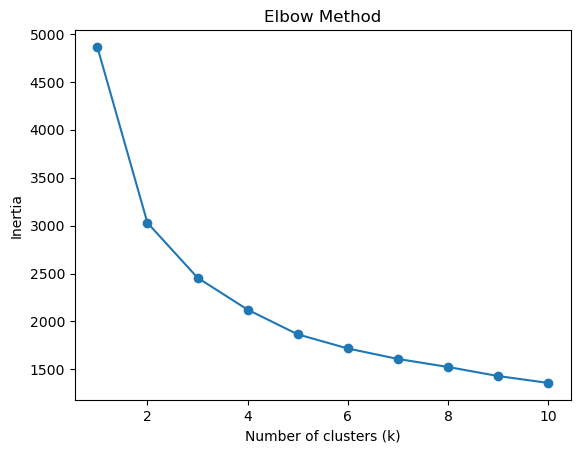

In [30]:
from sklearn.cluster import KMeans
import numpy as np

# Feature scaling if needed (KMeans is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned)

# Find the optimal value of k using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=25)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to visualize the optimal k
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [31]:
# Based on the Elbow Method, choose the optimal value of k
optimal_k = 3  # Choose the appropriate value based on the elbow plot

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=25)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster information to the dataframe
df_cleaned['Cluster'] = clusters

# Optionally, you can store the clusters along with the original data if needed
clustered_data = pd.concat([df_cleaned, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_9380/3800456814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = clusters


In [32]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.26303387207623136


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

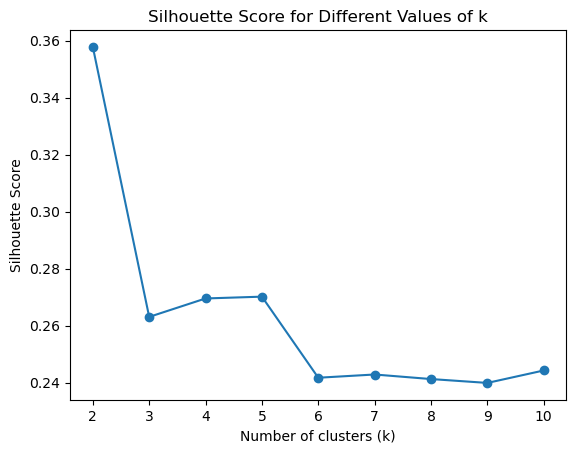

In [33]:
# Try different values of k and recompute silhouette scores
silhouette_scores = []
k_range = range(2, 11)  # Adjust the range as needed

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=25)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different k values
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()
